# Importing the necessary packages and modules

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from extract_dataframe import *
from clean_tweets_dataframe import *
from wordcloud import WordCloud

# Data Acquisition

We are going to use the downloaded data found a Documents/Tweet_Data_Analysis/Twitter-Data-Analysis-10Academy-Training/data/Economic_Twitter_Data.json. The data is going to be loaded into a dataframe using the exract_dataframe module

In [2]:
 tweets_len, tweet_list = read_json("data/Economic_Twitter_Data.json")

In [3]:
tweets_len     #check the length of the list

24625

In [4]:
tweet = TweetDfExtractor(tweet_list)
tweet_df = tweet.get_tweet_df(True)  #This creates the df and also saves it to a csv

File Successfully Saved.!!!


In [5]:
#confirm the loaded data
tweet_df.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,Fri Apr 22 22:20:18 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @nikitheblogger: Irre: Annalena Baerbock sa...,0.0,0.0,de,113,355,McMc74078966,3,12,None,[],"[{'screen_name': 'nikitheblogger', 'name': 'Ne...",None
1,Fri Apr 22 22:19:16 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @sagt_mit: Merkel schaffte es in 1 Jahr 1 M...,0.0,0.0,de,113,505,McMc74078966,3,12,None,[],"[{'screen_name': 'sagt_mit', 'name': 'Sie sagt...",None
2,Fri Apr 22 22:17:28 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @Kryptonoun: @WRi007 Pharma in Lebensmittel...,0.0,0.0,de,113,4,McMc74078966,3,12,None,[],"[{'screen_name': 'Kryptonoun', 'name': 'Krypto...",None
3,Fri Apr 22 22:17:20 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @WRi007: Die #Deutschen sind ein braves Vol...,0.0,0.0,de,113,332,McMc74078966,3,12,None,"[{'text': 'Deutschen', 'indices': [16, 26]}, {...","[{'screen_name': 'WRi007', 'name': 'Wolfgang B...",None
4,Fri Apr 22 22:13:15 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @RolandTichy: Baerbock verkündet mal so neb...,0.0,0.0,de,113,386,McMc74078966,3,12,None,[],"[{'screen_name': 'RolandTichy', 'name': 'Rolan...",None


# Data Preprocessing
Data preprocessing will involve a series of steps to prepare the data for modelling. In this section, we will do data cleaning and text vectorization. In order to understand the data better and select the best attributes to use, we will 
include a step on data visualization and exploratory data analysis (EDA)

### Data Cleaning
We will first clean the dataframe created above using the Clean_Dataframe class from clean_dataframe.py

In [6]:
#clean the data
def cleanDataframe():
    """
    This function cleans a dataframe by dropping unwanted columns, drop duplicates, convert column in the dataframe to the correct data types,
    and remove Non-English tweets    
    """
    dfCleaner = Clean_Tweets(tweet_df)   #Clean_Tweets object to use for cleaning
    df = dfCleaner.df
    
    #df cleaning
    dfCleaner.df = dfCleaner.drop_unwanted_column(dfCleaner.df)    #drop unwanted columns
    dfCleaner.df = dfCleaner.drop_duplicate(dfCleaner.df)          #drop duplicates
    dfCleaner.df = dfCleaner.convert_to_datetime(dfCleaner.df)  #convert datetime columns
    dfCleaner.df = dfCleaner.convert_to_numbers(dfCleaner.df)    #convert the numeric columns to number
    dfCleaner.df = dfCleaner.remove_non_english_tweets(dfCleaner.df) #Remove Non-English tweets
    
    return dfCleaner.df

### Cleaning the dataframe

In [7]:
print("Length of unclean dataframe is:", len(tweet_df))

Length of unclean dataframe is: 24625


In [8]:
clean_tweet_df = cleanDataframe()
print("Length of clean dataframe is:", len(clean_tweet_df))

Automation in Action...!!!
Length of clean dataframe is: 16374


In [9]:
clean_tweet_df.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
38,2022-04-22 22:17:05,"<a href=""http://twitter.com/download/android"" ...",RT @NorthstarCharts: The 10-year yield is tell...,0.16,0.540000,en,12179,43,davideiacovozzi,18,55,None,"[{'text': 'gold', 'indices': [116, 121]}, {'te...","[{'screen_name': 'NorthstarCharts', 'name': 'N...",None
39,2022-04-22 13:44:53,"<a href=""http://twitter.com/download/android"" ...",RT @MichaelAArouet: German 10y mortgage rate w...,0.15,0.175000,en,12179,32,davideiacovozzi,18,55,None,[],"[{'screen_name': 'MichaelAArouet', 'name': 'Mi...",None
41,2022-04-22 06:10:34,"<a href=""http://twitter.com/download/android"" ...",RT @goldseek: When? https://t.co/kO2FfHKaZg,0.00,0.000000,en,12179,26,davideiacovozzi,18,55,None,[],"[{'screen_name': 'goldseek', 'name': 'Peter ⚒ ...",None
42,2022-04-21 17:22:09,"<a href=""http://twitter.com/download/android"" ...",RT @charliebilello: The 30-year mortgage rate ...,0.00,0.183333,en,12179,213,davideiacovozzi,18,55,None,[],"[{'screen_name': 'charliebilello', 'name': 'Ch...",None
43,2022-04-21 10:32:26,"<a href=""http://twitter.com/download/android"" ...",RT @biancoresearch: Rates rise until something...,-0.40,0.400000,en,12179,417,davideiacovozzi,18,55,None,[],"[{'screen_name': 'biancoresearch', 'name': 'Ji...",None


### Data Visualization and Exploratory Data Analysis

In this section, we are going to explore features of our data in order to understand it better. 
We are going to run statistical tests to the data to understand its features better and also generate various plots and 
visualizations of the data in order to understand it better.

#### Analysing polarities and subjectivities of tweets

<ol>
    <li>First, we will group the values of polarity into 3 categories. </li>
        <ul>
            <li>Tweets with a polarity value of greater than 0.5 we categorize them as <strong>positive</strong>.</li>
            <li>Tweets with a polarity value of less than 0.5 we categorize them as <strong>negative</strong>.</li>
            <li>The rest of the tweets with polarity of 0.5 we categorize them as <strong>neutral</strong>.</li>
            <li> We have defined a function <strong> polarity_categories()</strong> to do the grouping and will 
                apply it to the dataframe by a new column called <strong>polarity_category</strong></li>
        </ul>
    <li>We will then plot these <strong>polarity_categories</strong> in a pie chart to see the categories better </li>
    <li>We will then generate a scatter plot that indicates the actual tweet based on its polarity and 
        subjectivity value</li>
        <ul>
            <li>positive tweets will be indicated on the plot with green dots</li>
            <li>negative tweets will be indicated by red dots</li>
            <li>neutral tweets will be indicated by blue dots</li>
            <li>Subjectivity scale will indicate whether the tweet was based on factual information or the personal opinions
                of the person tweeting. Higher subjectivity values indicate that the tweet is based on personal opinion and 
                not facts <.li>
        </ul>
    
</ol>


In [12]:
def polarity_categories(polarity):
    """
    This function categorizes the polarities of each tweet.
    polarity value> 0.5 is positive
    polarity value< 0.5 is negative
    polarity value between 0 and 0.5 is neutral
    """
    if (polarity> 0.5):
        return "positive"
    
    elif (polarity< 0.5):
        return "negative"
    
    elif (polarity==0.5):
        return "neutral"

In [13]:
#Apply the function to the dataframe
clean_tweet_df["polarity_category"]= clean_tweet_df["polarity"].apply(polarity_categories)
clean_tweet_df.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,polarity_category
38,2022-04-22 22:17:05,"<a href=""http://twitter.com/download/android"" ...",RT @NorthstarCharts: The 10-year yield is tell...,0.16,0.540000,en,12179,43,davideiacovozzi,18,55,None,"[{'text': 'gold', 'indices': [116, 121]}, {'te...","[{'screen_name': 'NorthstarCharts', 'name': 'N...",None,negative
39,2022-04-22 13:44:53,"<a href=""http://twitter.com/download/android"" ...",RT @MichaelAArouet: German 10y mortgage rate w...,0.15,0.175000,en,12179,32,davideiacovozzi,18,55,None,[],"[{'screen_name': 'MichaelAArouet', 'name': 'Mi...",None,negative
41,2022-04-22 06:10:34,"<a href=""http://twitter.com/download/android"" ...",RT @goldseek: When? https://t.co/kO2FfHKaZg,0.00,0.000000,en,12179,26,davideiacovozzi,18,55,None,[],"[{'screen_name': 'goldseek', 'name': 'Peter ⚒ ...",None,negative
42,2022-04-21 17:22:09,"<a href=""http://twitter.com/download/android"" ...",RT @charliebilello: The 30-year mortgage rate ...,0.00,0.183333,en,12179,213,davideiacovozzi,18,55,None,[],"[{'screen_name': 'charliebilello', 'name': 'Ch...",None,negative
43,2022-04-21 10:32:26,"<a href=""http://twitter.com/download/android"" ...",RT @biancoresearch: Rates rise until something...,-0.40,0.400000,en,12179,417,davideiacovozzi,18,55,None,[],"[{'screen_name': 'biancoresearch', 'name': 'Ji...",None,negative


Text(0, 0.5, '')

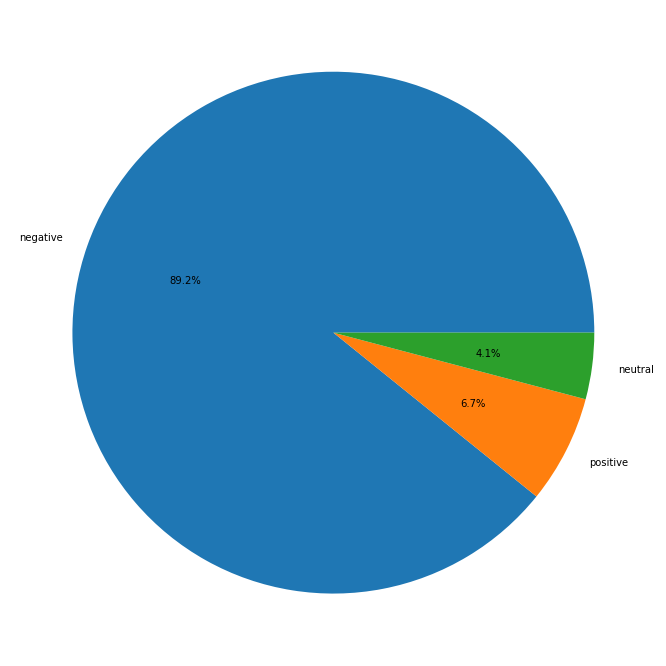

In [14]:
plt.rc('figure', figsize=(16, 12))    #change the size of the plots
clean_tweet_df['polarity_category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')

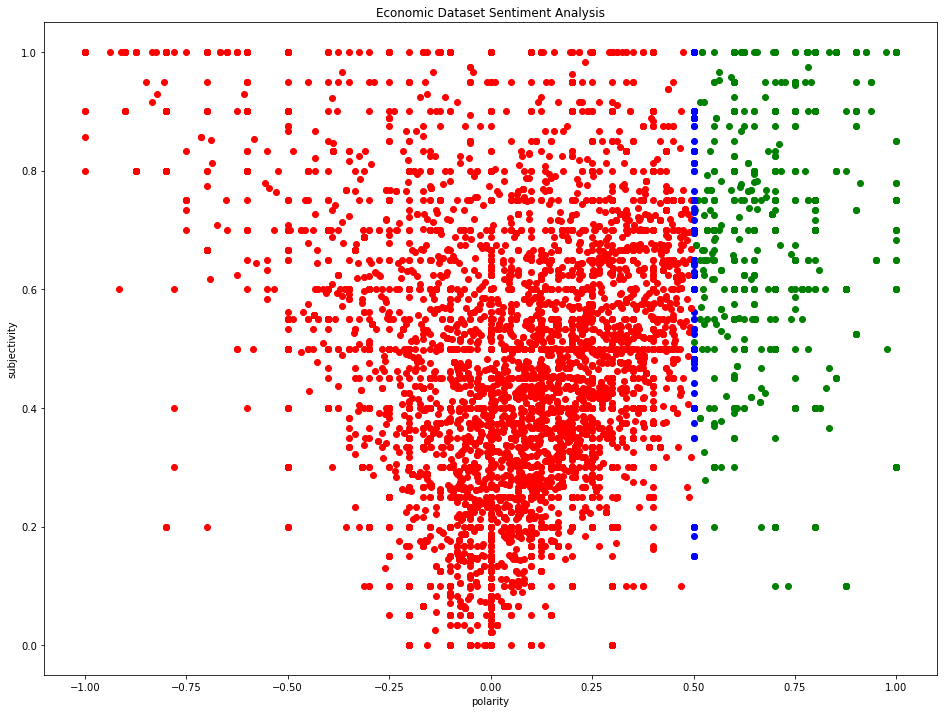

In [15]:
for index,row in clean_tweet_df.iterrows():
    if row['polarity_category']=='positive':
        plt.scatter(row['polarity'],row['subjectivity'],color='green')
    elif row['polarity_category']=='negative':
        plt.scatter(row['polarity'],row['subjectivity'],color='red')
    else:
        plt.scatter(row['polarity'],row['subjectivity'],color='blue')
plt.title('Economic Dataset Sentiment Analysis')
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.show()

#### Analysing most frequently used words in the tweets
We will use the <strong>WordCloud</strong> class from the <strong>wordcloud</strong> package to compute the most 
frequently used terms in the tweets. In the wordcloud diagram below, we can see that some of the most frequently used 
words in the tweets include: <em>Inflation, Russia, Ukraine, rate, China, support, market</em>

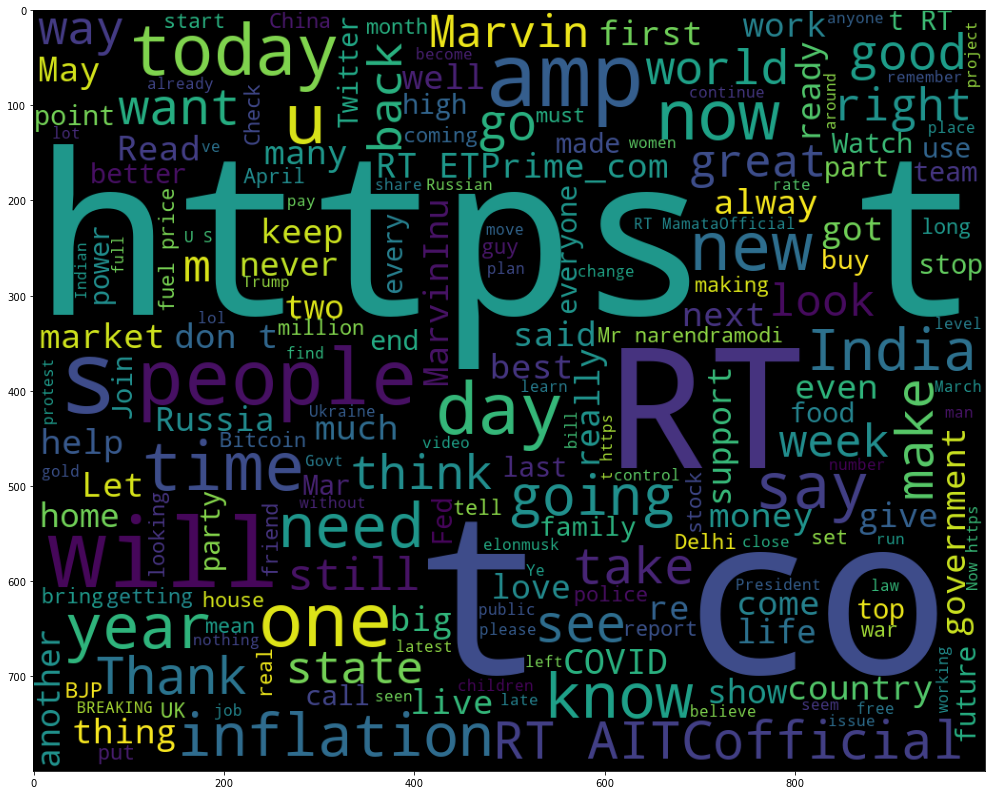

In [45]:
# Creating a word cloud
words = ' '.join([tweet for tweet in clean_tweet_df['original_text']])
wordCloud = WordCloud(width=1000, height=800).generate(words)

plt.imshow(wordCloud)
plt.show()

# Sentiments Analysis
In this step, we perform a detailed sentiments analysis on the economic dataset. The steps in this section are
<ol>
    <li>Extract text information from the tweets. This include removing RT and other 
        noisy text from the full tweet text.</li>
    <li>Compute the polarity, subjectivity and compound values of the clean tweet text</li>
    <li>Categorize the tweets as either being positive, negative or neutral based on polarity score</li>
    <li>Create a word cloud for: 
        <ul>
            <li>all tweets</li>
            <li>Positive tweets</li>
            <li>Negative tweets</li>
            <li>Neutral tweets</li>
        </ul>
    <li>Calculating the tweet lenghth and word count in each tweet</li>
    <li>Clean the text by:
        <ul>
            <li>Removing punctuations<li>
            <li>Tokenization</li>
            <li>Removing stop words<li>          
            <li>Applying stemmer</li>
        </ul>
    </li>
    <li>Appliyng Countvectorizer</li>
    <li>Compute most used words</li>
    <li>Compute n-grams</li>
    <li>compute bigrams</li>
 </ol>
    
    
    
        
    

## Extracting Text Information

In [59]:
import re
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
import string
import numpy as np

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [16]:
text_list = clean_tweet_df['original_text']


In [17]:
text_list.head()


38    RT @NorthstarCharts: The 10-year yield is tell...
39    RT @MichaelAArouet: German 10y mortgage rate w...
41          RT @goldseek: When? https://t.co/kO2FfHKaZg
42    RT @charliebilello: The 30-year mortgage rate ...
43    RT @biancoresearch: Rates rise until something...
Name: original_text, dtype: object

In [17]:
text_df = pd.DataFrame(text_list)
text_df.head()

In [18]:
text_df.head()

,original_text
38,RT @NorthstarCharts: The 10-year yield is tell...
39,RT @MichaelAArouet: German 10y mortgage rate w...
41,RT @goldseek: When? https://t.co/kO2FfHKaZg
42,RT @charliebilello: The 30-year mortgage rate ...
43,RT @biancoresearch: Rates rise until something...


In [22]:
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features
text_df["text"] = text_df.iloc[:, 0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
text_df["text"] = text_df.text.map(remove_rt).map(rt)
text_df["text"] = text_df.text.str.lower()
text_df.head(10)

,original_text,text
38,RT @NorthstarCharts: The 10-year yield is tell...,the 10 year yield is telling us that there s ...
39,RT @MichaelAArouet: German 10y mortgage rate w...,german 10y mortgage rate went from 0 8 to 2 ...
41,RT @goldseek: When? https://t.co/kO2FfHKaZg,when
42,RT @charliebilello: The 30-year mortgage rate ...,the 30 year mortgage rate in the us rises to ...
43,RT @biancoresearch: Rates rise until something...,rates rise until something breaks is anythi...
44,RT @LanceRoberts: Buying opportunities like th...,buying opportunities like this only occur eve...
45,RT @MacroAlf: Welcome to September 2018.\n\nBo...,welcome to september 2018 bond markets test...
46,RT @BotBenFranklin: The horse thinks one thing...,the horse thinks one thing and he that saddl...
47,RT @Galactic_Trader: Global growth optimism at...,global growth optimism at all time lows we...
48,RT @AndreasSteno: This is the most important c...,this is the most important chart in the world...


### Categorize the tweets as either being positive, negative or neutral based on polarity score

In [30]:
#Calculating Negative, Positive, Neutral and Compound values

text_df[['polarity', 'subjectivity']] = text_df['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in text_df['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        text_df.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        text_df.loc[index, 'sentiment'] = "positive"
    else:
        text_df.loc[index, 'sentiment'] = "neutral"
    text_df.loc[index, 'negative'] = neg
    text_df.loc[index, 'neutral'] = neu
    text_df.loc[index, 'positive'] = pos
    text_df.loc[index, 'compound'] = comp

text_df.head(10)

,original_text,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,negative,neutral,positive
38,RT @NorthstarCharts: The 10-year yield is tell...,the 10 year yield is telling us that there s ...,0.160000,0.540000,negative,0.100,0.900,0.000,-0.2732,0.100,0.900,0.000
39,RT @MichaelAArouet: German 10y mortgage rate w...,german 10y mortgage rate went from 0 8 to 2 ...,0.150000,0.175000,neutral,0.000,1.000,0.000,0.0000,0.000,1.000,0.000
41,RT @goldseek: When? https://t.co/kO2FfHKaZg,when,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000,0.000,1.000,0.000
42,RT @charliebilello: The 30-year mortgage rate ...,the 30 year mortgage rate in the us rises to ...,0.000000,0.183333,negative,0.080,0.920,0.000,-0.2732,0.080,0.920,0.000
43,RT @biancoresearch: Rates rise until something...,rates rise until something breaks is anythi...,-0.400000,0.400000,negative,0.279,0.721,0.000,-0.4767,0.279,0.721,0.000
44,RT @LanceRoberts: Buying opportunities like th...,buying opportunities like this only occur eve...,-0.100000,0.550000,positive,0.000,0.611,0.389,0.6249,0.000,0.611,0.389
45,RT @MacroAlf: Welcome to September 2018.\n\nBo...,welcome to september 2018 bond markets test...,0.400000,0.637500,positive,0.088,0.714,0.197,0.3818,0.088,0.714,0.197
46,RT @BotBenFranklin: The horse thinks one thing...,the horse thinks one thing and he that saddl...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000,0.000,1.000,0.000
47,RT @Galactic_Trader: Global growth optimism at...,global growth optimism at all time lows we...,0.250000,0.250000,positive,0.079,0.655,0.266,0.6486,0.079,0.655,0.266
48,RT @AndreasSteno: This is the most important c...,this is the most important chart in the world...,0.366667,0.566667,negative,0.130,0.779,0.091,0.0240,0.130,0.779,0.091


In [31]:
text_df.drop(['neg', 'neu', 'pos'],axis=1)

,original_text,text,polarity,subjectivity,sentiment,compound,negative,neutral,positive
38,RT @NorthstarCharts: The 10-year yield is tell...,the 10 year yield is telling us that there s ...,0.16,0.540000,negative,-0.2732,0.100,0.900,0.000
39,RT @MichaelAArouet: German 10y mortgage rate w...,german 10y mortgage rate went from 0 8 to 2 ...,0.15,0.175000,neutral,0.0000,0.000,1.000,0.000
41,RT @goldseek: When? https://t.co/kO2FfHKaZg,when,0.00,0.000000,neutral,0.0000,0.000,1.000,0.000
42,RT @charliebilello: The 30-year mortgage rate ...,the 30 year mortgage rate in the us rises to ...,0.00,0.183333,negative,-0.2732,0.080,0.920,0.000
43,RT @biancoresearch: Rates rise until something...,rates rise until something breaks is anythi...,-0.40,0.400000,negative,-0.4767,0.279,0.721,0.000
...,...,...,...,...,...,...,...,...,...
24584,RT @CHARANJITCHANNI: Best wishes &amp; heartfe...,best wishes amp heartfelt congratulations t...,0.50,0.729630,positive,0.9382,0.000,0.415,0.585
24586,RT @pbhushan1: Thank you @BajpayeeManoj for th...,thank you for this beautiful message of com...,0.85,1.000000,positive,0.9190,0.000,0.535,0.465
24596,RT @s_shreyatweets: Agree ?👇 https://t.co/R54Z...,agree,0.00,0.000000,positive,0.3612,0.000,0.000,1.000
24599,RT @tejjINC: 1. Peace Yatra by Late Sunil Dutt...,1 peace yatra by late sunil dutt from mumbai...,-0.30,0.600000,positive,0.7906,0.000,0.650,0.350


In [32]:
#Creating new data frames for all sentiments (positive, negative and neutral)

text_df_negative = text_df[text_df["sentiment"]=="negative"]
text_df_positive = text_df[text_df["sentiment"]=="positive"]
text_df_neutral = text_df[text_df["sentiment"]=="neutral"]

In [33]:
text_df_negative.head()

,original_text,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,negative,neutral,positive
38,RT @NorthstarCharts: The 10-year yield is tell...,the 10 year yield is telling us that there s ...,0.160000,0.540000,negative,0.100,0.900,0.000,-0.2732,0.100,0.900,0.000
42,RT @charliebilello: The 30-year mortgage rate ...,the 30 year mortgage rate in the us rises to ...,0.000000,0.183333,negative,0.080,0.920,0.000,-0.2732,0.080,0.920,0.000
43,RT @biancoresearch: Rates rise until something...,rates rise until something breaks is anythi...,-0.400000,0.400000,negative,0.279,0.721,0.000,-0.4767,0.279,0.721,0.000
48,RT @AndreasSteno: This is the most important c...,this is the most important chart in the world...,0.366667,0.566667,negative,0.130,0.779,0.091,0.0240,0.130,0.779,0.091
53,RT @LanceRoberts: Another reason #deflation is...,another reason deflation is a larger problem...,0.000000,0.500000,negative,0.104,0.896,0.000,-0.2144,0.104,0.896,0.000


In [35]:
#Function for count_values_in single columns

def columnValueCount(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [37]:
#Count_values for sentiment
columnValueCount(text_df,"sentiment")

,Total,Percentage
positive,7003,42.77
neutral,5229,31.93
negative,4142,25.30


### Visualize the tweet sentiments info

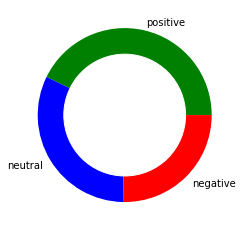

In [39]:
# create data for Pie Chart
pichart = columnValueCount(text_df,"sentiment")
names= pichart.index
size=pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [40]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


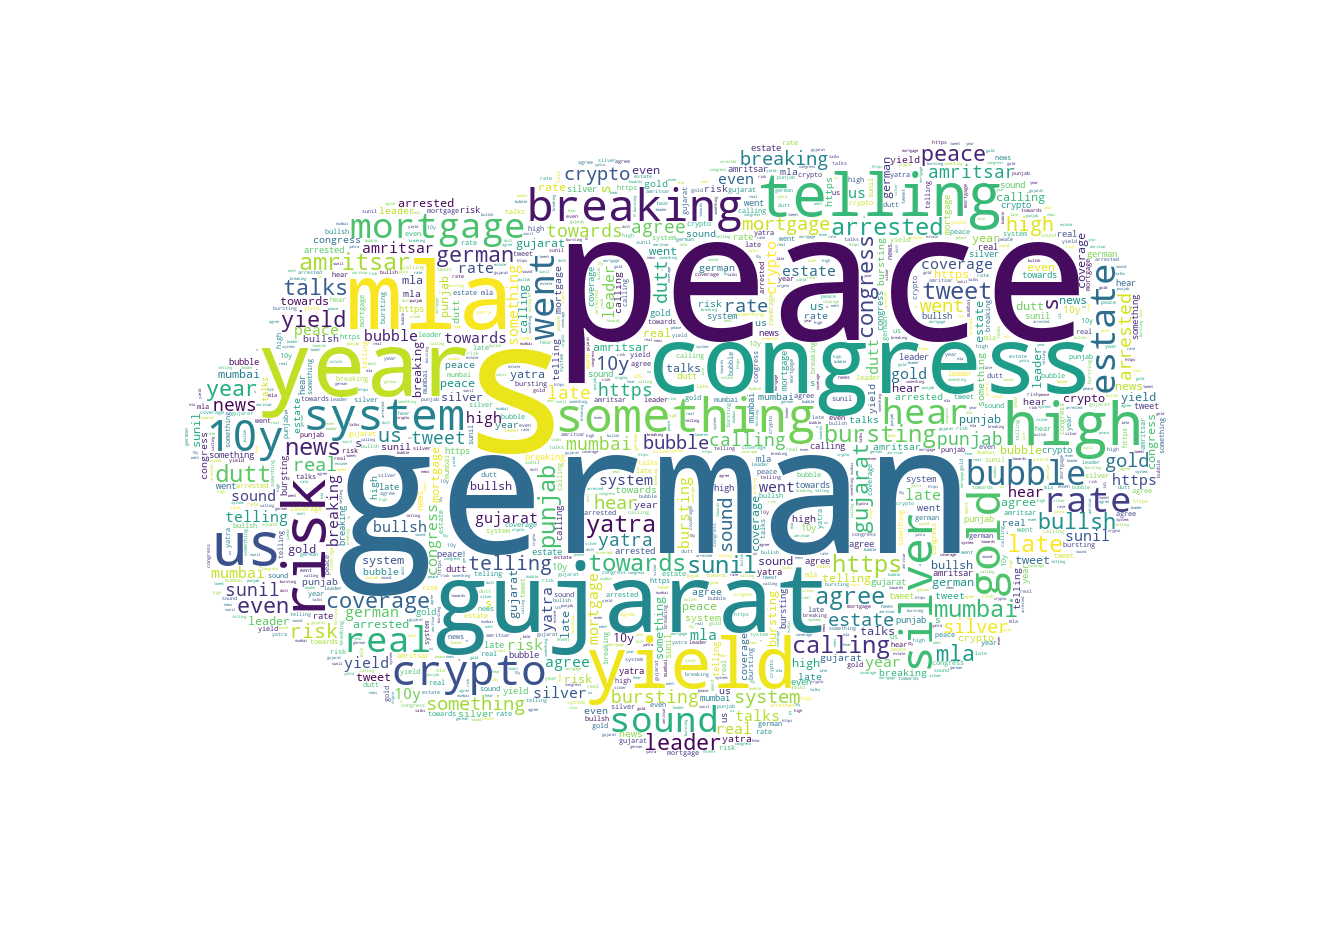

In [45]:
#Creating wordcloud for all tweets
create_wordcloud(text_df["text"].values)

Word Cloud Saved Successfully


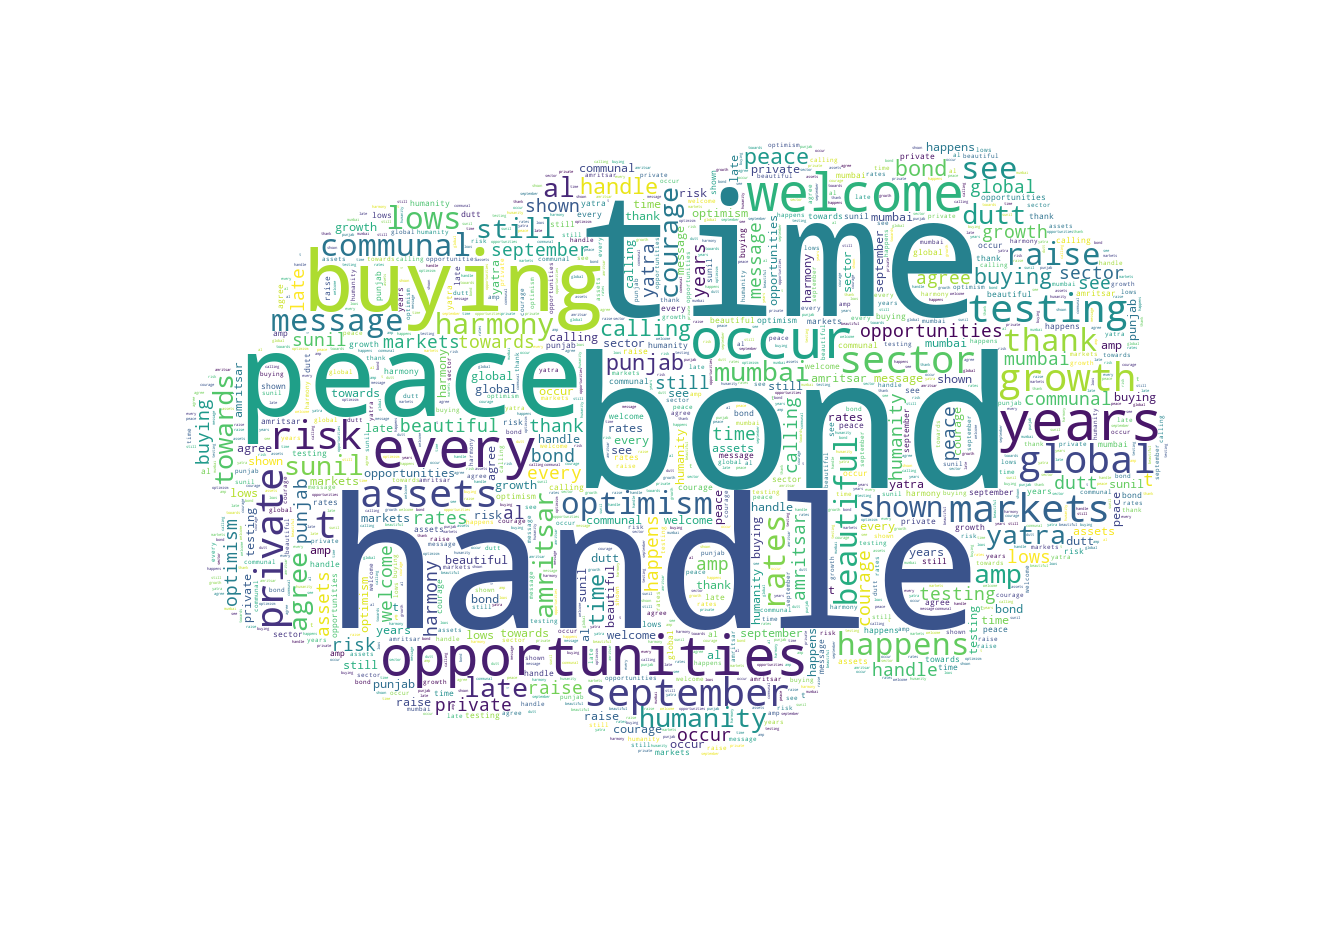

In [46]:
#Creating wordcloud for positive sentiment
create_wordcloud(text_df_positive["text"].values)

Word Cloud Saved Successfully


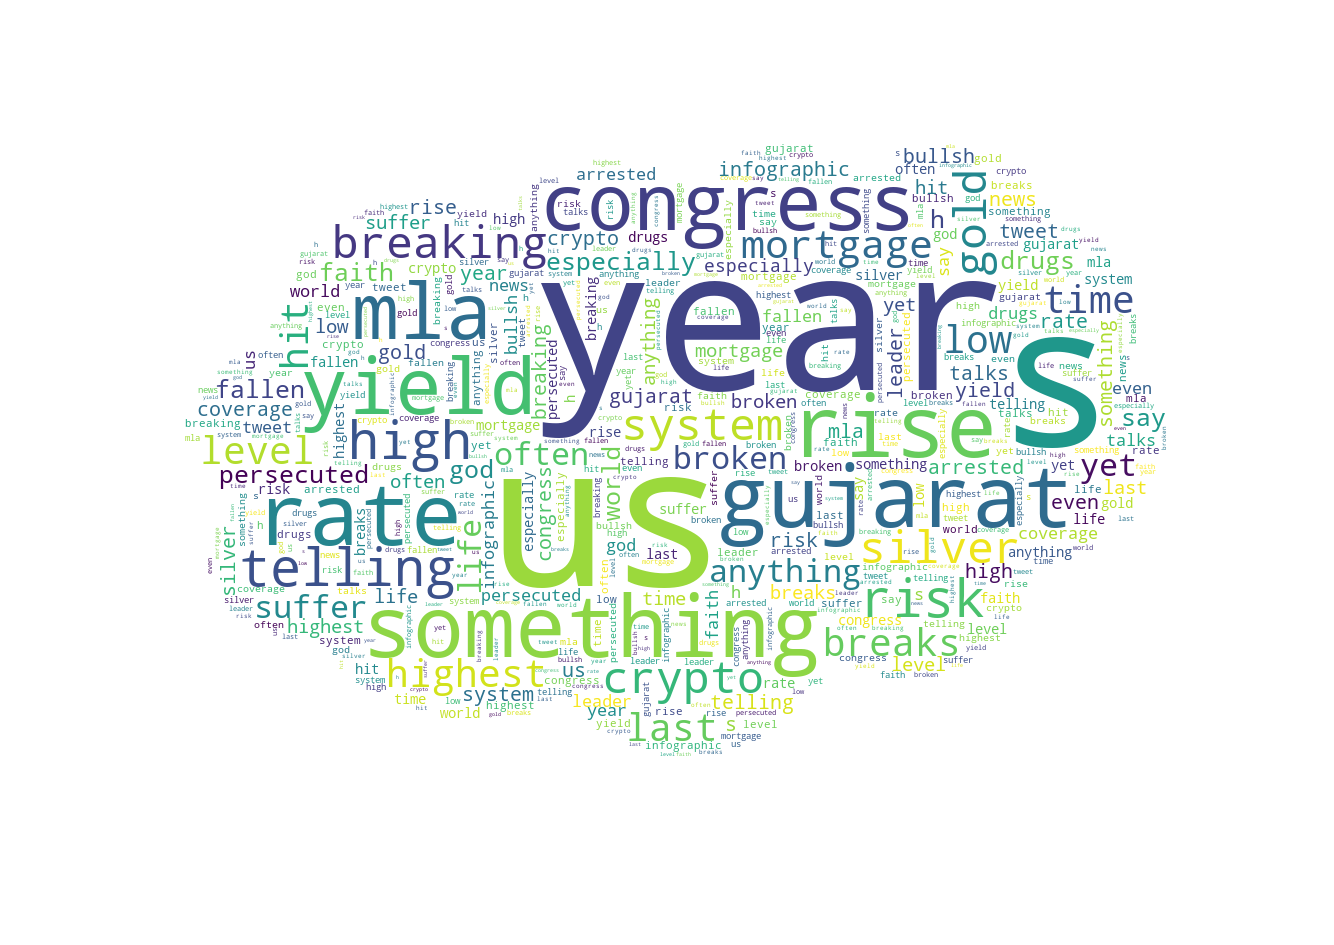

In [47]:
#Creating wordcloud for negative sentiment
create_wordcloud(text_df_negative["text"].values)

Word Cloud Saved Successfully


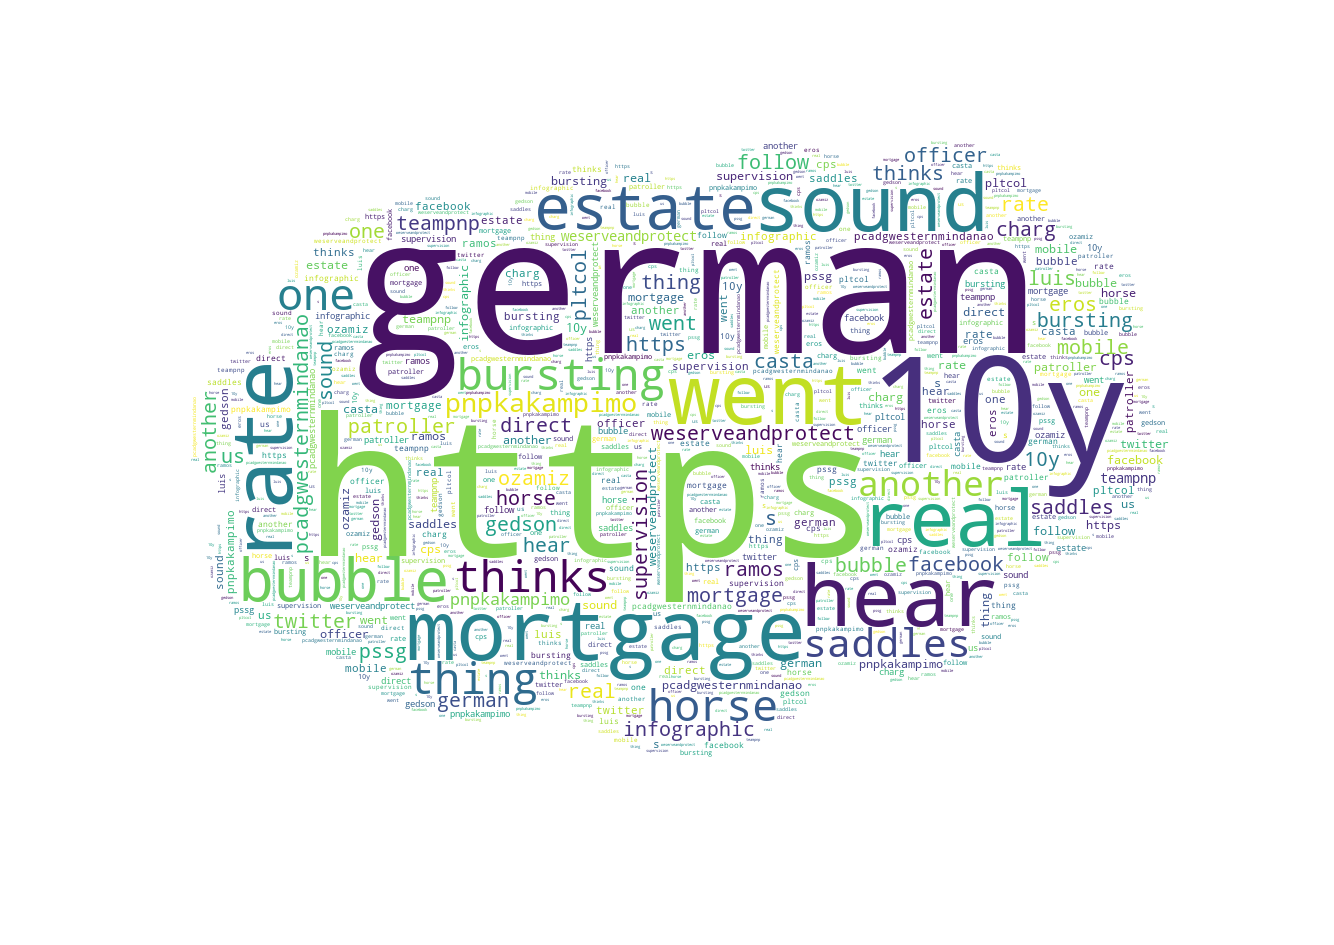

In [48]:
#Creating wordcloud for neutral sentiment
create_wordcloud(text_df_neutral["text"].values)

### Calculating tweet's length and word count

In [49]:
#Calculating tweet's lenght and word count
text_df['text_len'] = text_df['text'].astype(str).apply(len)
text_df['word_count'] = text_df['text'].apply(lambda x: len(str(x).split()))

In [51]:
round(pd.DataFrame(text_df.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,101.42
neutral,82.62
positive,97.58


In [52]:
round(pd.DataFrame(text_df.groupby("sentiment").word_count.mean()),2)

,word_count
sentiment,
negative,17.05
neutral,13.29
positive,16.29


### Further tweets cleaning before analysis

In [56]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

text_df['punct'] = text_df['text'].apply(lambda x: remove_punct(x))

In [57]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

text_df['tokenized'] = text_df['punct'].apply(lambda x: tokenization(x.lower()))

In [60]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
text_df['nonstop'] = text_df['tokenized'].apply(lambda x: remove_stopwords(x))

In [62]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

text_df['stemmed'] = text_df['nonstop'].apply(lambda x: stemming(x))

In [63]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [66]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(text_df['text'])
print('{} tweets have {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

16374 tweets have 16960 words


In [67]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

C:\Users\User\anaconda3\envs\TwitterDataAnalysis\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,aa,aaa,aaaww,aab,aabideen,aadmi,aag,aah,aaj,...,zubair,zubairpara,zuck,zuckerberg,zulu,zuma,zureik,zwc,zweig,zzbhagkqabpvuafimk
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Compute most used words

In [68]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
amp,848
get,659
marvin,643
peopl,607
day,595
go,577
like,571
year,563
one,537
time,533


### Compute N-grams

In [69]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

### Compute Bigrams

In [70]:
#n2_bigram
n2_bigrams = get_top_n_gram(text_df['text'],(2,2),20)

n2_bigrams

[('ni tel', 73),
 ('fuel prices', 69),
 ('new india', 65),
 ('covid 19', 58),
 ('lka srilanka', 58),
 ('marjorie taylor', 56),
 ('9p diesel', 56),
 ('elon musk', 55),
 ('taylor greene', 55),
 ('marvin inu', 55),
 ('hon ble', 54),
 ('marvin marvin', 52),
 ('inflation economy', 51),
 ('sri lanka', 51),
 ('prices avg', 50),
 ('economy biden', 48),
 ('supply chain', 46),
 ('dollar gold', 46),
 ('biden dollar', 46),
 ('courtesy ig', 46)]

### Compute Trigrams

In [71]:
#n3_trigram
n3_trigrams = get_top_n_gram(text_df['text'],(3,3),20)

n3_trigrams

[('marjorie taylor greene', 50),
 ('inflation economy biden', 48),
 ('economy biden dollar', 46),
 ('courtesy ig page', 46),
 ('biden dollar gold', 45),
 ('download mehangai daily', 44),
 ('mehangai daily updates', 44),
 ('daily updates city', 44),
 ('updates city fuel', 44),
 ('city fuel prices', 44),
 ('fuel prices download', 44),
 ('prices download android', 44),
 ('download android app', 44),
 ('crypto whale transfer', 42),
 ('whale transfer alert', 42),
 ('unity main strength', 41),
 ('news item courtesy', 41),
 ('main strength united', 40),
 ('strength united india', 40),
 ('united india dream', 40)]